# Boston Housing dataset analysis

This is an exploratory data analysis into a dataset containing information collected by the US Census Service concering housing in the area of Boston Mass. The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

This link provides more detail on the dataset, including descriptions of the 14 attributes: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

## Dataset overview

Below is a dataframe containing the dataset. This tells us that the dataframe has 506 rows, with 14 columns. Each row represents a case in the dataset, and each column represents one of the 14 attributes.

In [11]:
import pandas as pd

# List of column names
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','B','PTRATIO','LSTAT','MEDV']

# Create dataframe from housing dataset csv file
df = pd.read_csv('housing.csv', names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Descriptive/Summary statistics

To better understand the dataset, it would be good to obtain a summary of it's characterstics. Below are some descriptive statistics related to the dataset.

In [14]:
# Return a dataframe with descriptive stats, rounded to 3 decimal places
df.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,PTRATIO,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


Now let's pick one of the attributes/columns from the dataframe above, and list the descriptive statistics that have been returned:

### **CRIM (Crime rate per capita by town)**
- Count: 506
- Mean: 3.614
- Standard Deviation: 8.602
- Minimum: 0.006
- 25th Percentile: 0.082
- 50th Percentile: 0.257
- 75th Percentile: 3.677
- Maximum: 88.976

Using a histogram, we can visualise how the *Crime rate per capita by town* data is distributed


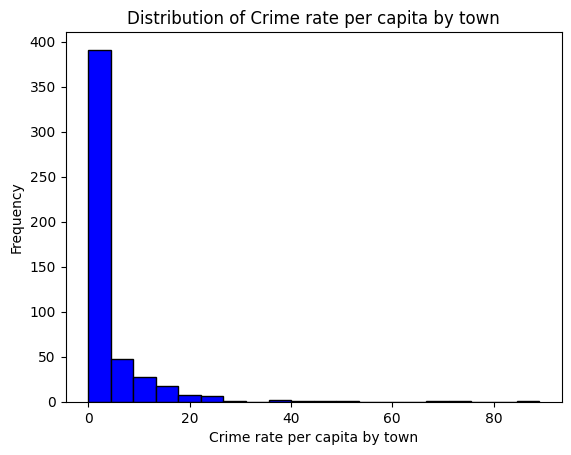

In [18]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df
# If not, you should read your CSV file or create a DataFrame first

# Plot a histogram
plt.hist(df['CRIM'], bins=20, color='blue', edgecolor='black')
plt.title(f'Distribution of Crime rate per capita by town')
plt.xlabel('Crime rate per capita by town')
plt.ylabel('Frequency')
plt.show()

The histogram above shows us that the data is heavily distributed towards the lower end. For example, the vast majority of cases (almost 400 out of 506) have a crime rate below 4 per capita. The next step is to calculate skewness and kurtosis statistics, to provide measures of the distribution of data:

In [24]:
from scipy.stats import skew, kurtosis

skewness = skew(df['CRIM'])
kurt = kurtosis(df['CRIM'])

# Print the results
print(f"Skewness of Crime rate per capita by town: {skewness: .2f}")
print(f"Kurtosis of Crime rate per capita by town: {kurt: .2f}")

Skewness of Crime rate per capita by town:  5.21
Kurtosis of Crime rate per capita by town:  36.75


The positive skewness figure of 5.21 actually shows us that the distribution is slightly skewed to the right, i.e. the mean is typically greater than the median. The positive kurtosis figure of 36.75 indicates that the distribution has heavier tails and a sharper peak than normal distribution. It indicates that there are more extreme values in the tails, this makes sense considering that the histogram shows that the peak is between 0-4.

## Scatterplots with correlation coefficients

Scatterplots and correlation coefficients show us correlations between attributes/variables in the dataset

### Median value of homes in $1000s vs Percentage of units built before 1940

Correlation Coefficient: -0.37695456500459623


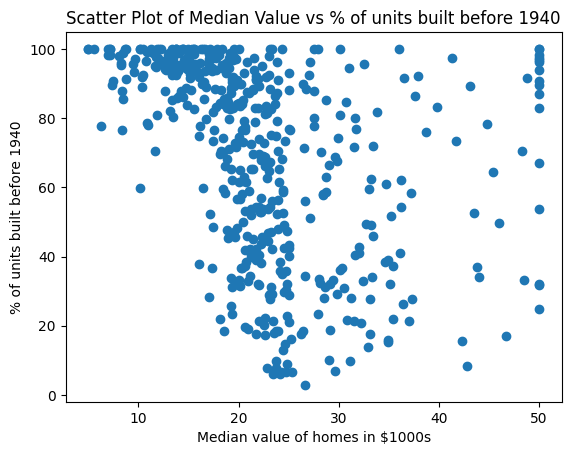

In [5]:
import matplotlib.pyplot as plt

# Create scatter plot using values from median value and age of units columns
plt.scatter(df['MEDV'], df['AGE'])
plt.title('Scatter Plot of Median Value vs % of units built before 1940')
plt.xlabel('Median value of homes in $1000s')
plt.ylabel('% of units built before 1940')

# Calculate the correlation coefficient
correlation_coefficient = df['MEDV'].corr(df['AGE'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

# Show the plot
plt.show()

There is a moderate negative correlation between Median value of homes in $1000s and Percentage of units built before 1940.

### Median value of homes in $1000s vs Average no. of rooms per dwelling

Correlation Coefficient: 0.6953599470715393


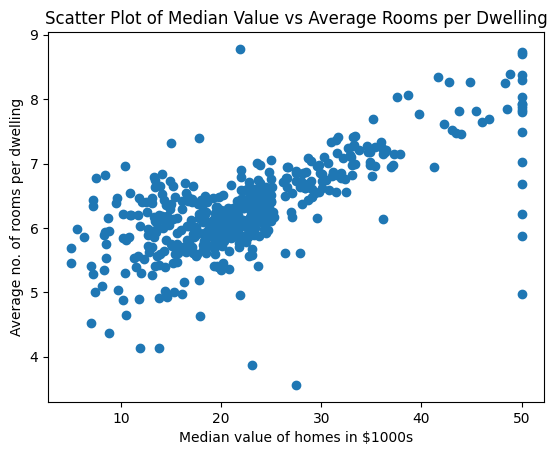

In [6]:
# Create scatter plot using values from median value and age of units columns
plt.scatter(df['MEDV'], df['RM'])
plt.title('Scatter Plot of Median Value vs Average Rooms per Dwelling')
plt.xlabel('Median value of homes in $1000s')
plt.ylabel('Average no. of rooms per dwelling')

# Calculate the correlation coefficient
correlation_coefficient = df['MEDV'].corr(df['RM'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

# Show the plot
plt.show()

There is a strong positive correlation between Median value of homes in $1000s and Average number of rooms per dwelling.

## Percentile-based analysis

We want to look at rows within the dataset which a crime rate value falling within the top 1%.

In [7]:
# Calculate the 99th percentile
threshold_crim = df['CRIM'].quantile(0.99)

# Create dataframe of all rows with crime rate in or above 99th percentile
high_crime_df = df[df['CRIM'] >= threshold_crim]

high_crime_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,PTRATIO,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,10.4
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666.0,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62,8.8


Now, let's look at rows within the dataset which have a median value of homes falling within the top 1%.

In [8]:
threshold_medv = df['MEDV'].quantile(0.99)

high_medv_df = df[df['MEDV'] >= threshold_medv]

high_medv_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,PTRATIO,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0
